In [31]:
import numpy as np 
from copy import deepcopy
import matplotlib.pyplot as plt
%matplotlib inline

## Feed Forward NN

In [32]:
def feed_forward(inputs, outputs, weights):
    pre_hidden = np.dot(inputs, weights[0]) + weights[1]
    hidden = 1 / (1 + np.exp(-pre_hidden))
    pred_out = np.dot(hidden, weights[2]) + weights[3]
    mean_squared_error = np.mean(np.square(pred_out - outputs))
    return mean_squared_error

In [33]:
# inputs = np.array([
#     [0, 0],
#     [0, 1],
#     [1, 0],
#     [1, 1]
# ])

# outputs = np.array([
#     [0],
#     [1],
#     [1],
#     [0]
# ])
# W1 = np.array([
#     [0.2, -0.3],
#     [0.4,  0.1]
# ])
# b1 = np.array([0.1, -0.2])

# W2 = np.array([
#     [0.6],
#     [-0.4]
# ])
# b2 = np.array([0.05])

# # all into one list
# weights = [W1, b1, W2, b2]

# loss = feed_forward(inputs, outputs, weights)
# print('loss: ', loss)

## Backprop

In [ ]:
def update_weights(inputs, outputs, weights, lr):
    # keeping copy of weights
    original_weights = deepcopy(weights)
    temp_weights = deepcopy(weights)
    updated_weights = deepcopy(weights)

    # make predictions, compute loss
    original_loss = feed_forward(inputs, outputs, original_weights)

    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001 # (x + h)
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            # slope/derivative = f(x + h) - f(x) / h 
            grad = (_loss_plus - original_loss) / 0.0001
            # update weights
            updated_weights[i][index] -= grad * lr
    return updated_weights, original_loss

In [35]:
# inputs = np.array([[0.5, 1.2],
#                    [1.0, -0.7]])
# outputs = np.array([[1.0],
#                     [0.0]])
# W1 = np.array([
#     [0.2, -0.3],
#     [0.4,  0.1]
# ])
# b1 = np.array([0.1, -0.2])
# W2 = np.array([
#     [0.6],
#     [-0.4]
# ])
# b2 = np.array([0.05])
# weights = [W1, b1, W2, b2]

# lr = 0.01
# updated_weights, original_loss = update_weights(inputs, outputs, weights, lr)
# display('weights: ', updated_weights, 'loss: ', original_loss)

In [36]:
# using chain rule

# data
x = np.array([[1,1]])
y = np.array([[0]])

# weights
W = [
 # layer 1 weights 
 np.array([[-0.0053, 0.3793],
 [-0.5820, -0.5204],
 [-0.2723, 0.1896]], dtype=np.float32).T,
 # hidden layer weights
 np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32),
 np.array([[ 0.1528,-0.1745,-0.1135]],dtype=np.float32).T,
 # output layer weights
 np.array([-0.5516], dtype=np.float32)
]

# 100 epochs
losses = []
for i in range(100):
    W, loss = update_weights(x, y, W, 0.01)
    losses.append(loss)
display(losses[:10])

[np.float64(0.33455008989960927),
 np.float64(0.31207511631926566),
 np.float64(0.2911120956789758),
 np.float64(0.2715584285618008),
 np.float64(0.25331865368289397),
 np.float64(0.23630390535663506),
 np.float64(0.22043418057939854),
 np.float64(0.20562934393762614),
 np.float64(0.19181767195565072),
 np.float64(0.17893238381869275)]

In [37]:
# updated weights after training
display(W)

[array([[ 0.01424004, -0.5907864 , -0.27549535],
        [ 0.39883757, -0.52918637,  0.18640439]], dtype=float32),
 array([ 0.00554004,  0.5519136 , -0.06599568], dtype=float32),
 array([[ 0.3475135 ],
        [-0.05529078],
        [ 0.03760847]], dtype=float32),
 array([-0.22443289], dtype=float32)]

Text(0, 0.5, 'loss')

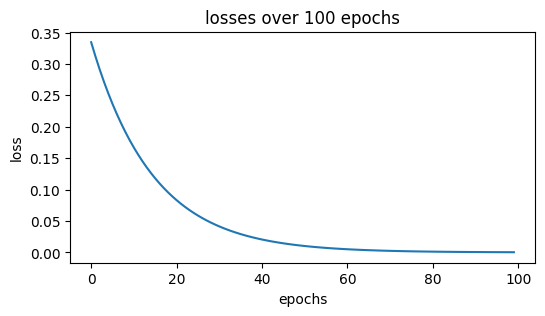

In [38]:
plt.figure(figsize=(6,3))
plt.plot(losses)
plt.title('losses over 100 epochs')
plt.xlabel('epochs')
plt.ylabel('loss')

In [39]:
pre_hidden = np.dot(x, W[0]) + W[1]
hidden = 1 / (1 + np.exp(-pre_hidden))
pred_out = np.dot(hidden, W[2]) + W[3]
display(pred_out)

array([[-0.0174781]])